# 1️⃣ Bölüm — Veri Tanıma ve İlk Gözlem

## 1. Veri yükleme

In [21]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Rayiha\\Desktop\\lecture3\\train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Eksik değer analizi

In [7]:
df.isnull().sum()
df.isnull().mean().sort_values(ascending=False).head(10)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Sex            0.000000
Parch          0.000000
SibSp          0.000000
dtype: float64

## 2. Veri yapısını inceleme

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2️⃣ Bölüm — Eksik Değer Analizi

## 📍 Amaç → Data-cleaning pratiği

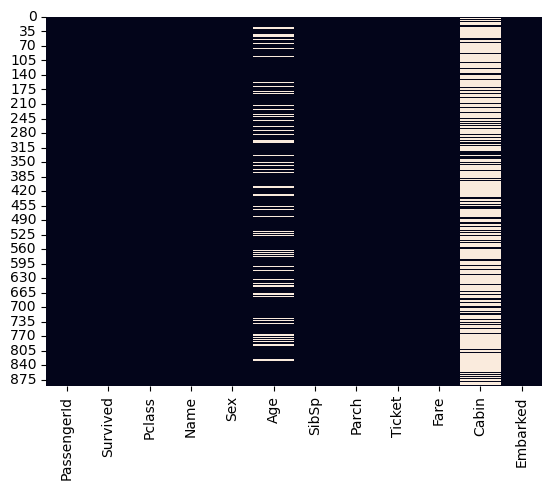

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [17]:
import pandas as pd

# Titanic verisini yüklediğini varsayalım
df = pd.read_csv("train.csv")

# Cabin sütunundaki toplam değer sayısı
total_cabin = len(df["Cabin"])

# Cabin sütunundaki eksik değer sayısı
missing_cabin = df["Cabin"].isna().sum()

# Eksik değer oranı
missing_ratio = missing_cabin / total_cabin *100

print("Total Cabin entries:", total_cabin)
print("Missing Cabin entries:", missing_cabin)
print("Missing percentage:", missing_ratio)


Total Cabin entries: 891
Missing Cabin entries: 687
Missing percentage: 77.10437710437711


In [19]:
# Age sütunundaki toplam değer sayısı
total_age = len(df["Age"])

# Age sütunundaki eksik değer sayısı
missing_age = df["Age"].isna().sum()

# Eksik değer oranı
missing_ratio_age = missing_age / total_age *100

print("Total Age entries:", total_age)
print("Missing Age entries:", missing_age)
print("Missing ratio:", missing_ratio_age)

Total Age entries: 891
Missing Age entries: 177
Missing ratio: 19.865319865319865


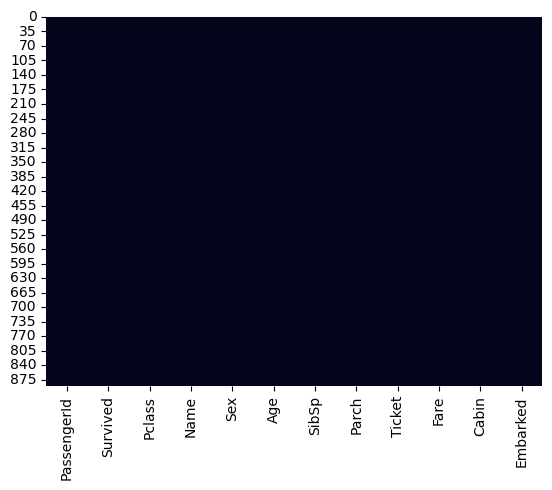

In [8]:
# Age sütunundaki eksikleri median ile dolduruyoruz
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

# Embarked sütunundaki eksikleri mod ile dolduruyoruz
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin kolonunda çok fazla eksik olduğu için isteğe bağlı olarak işaretleyebiliriz
df.loc[:, 'Cabin'] = df['Cabin'].fillna("Unknown")

# Kontrol
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# 3️⃣ Bölüm — Outlier (Aykırı Değer) Analizi

### Bu derste Age ve Fare değişkenlerini kullanacağız. Çünkü:

### Değişken	Neden seçiyoruz?
### Age	İnsan yaşlarının doğal dağılımı vardır — aykırı değer analizi için ideal
### Fare	Gemide ödenen ücretler çok farklı → outlier’lar bol

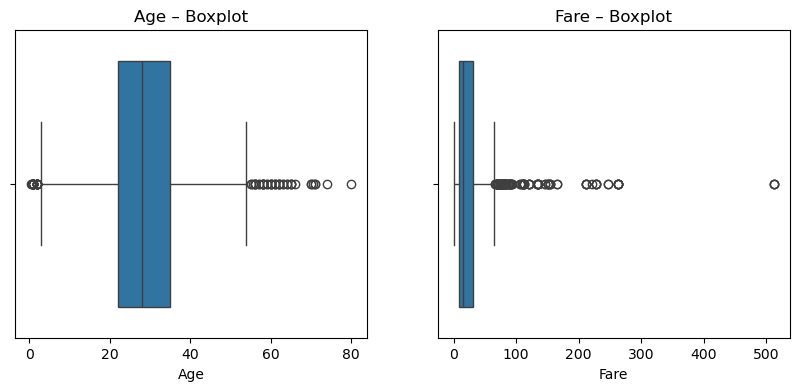

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Age – Boxplot")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Fare – Boxplot")

plt.show()



--- Pclass = 1 için Outlier Analizi ---
Alt sınır: -62.94, Üst sınır: 187.36
Outlier sayısı: 20


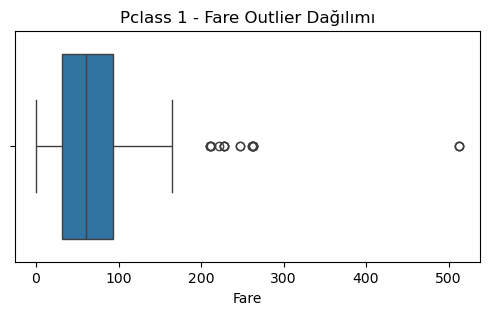


--- Pclass = 2 için Outlier Analizi ---
Alt sınır: -6.50, Üst sınır: 45.50
Outlier sayısı: 7


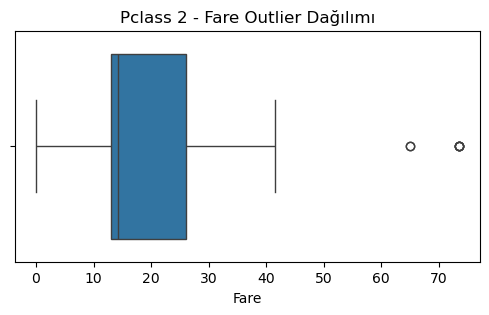


--- Pclass = 3 için Outlier Analizi ---
Alt sınır: -3.88, Üst sınır: 27.12
Outlier sayısı: 52


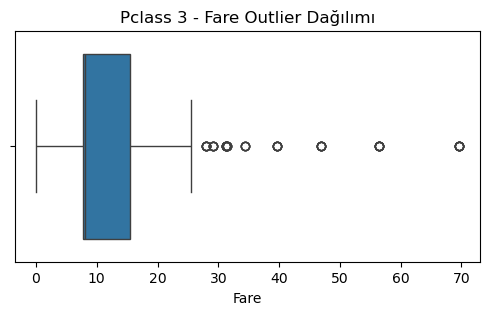

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pclass gruplarını gezelim ve her sınıf için analiz yapalım
for p in sorted(df['Pclass'].unique()):
    print(f"\n--- Pclass = {p} için Outlier Analizi ---")

    group = df[df['Pclass'] == p]['Fare']
    
    # IQR hesaplama
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Outlier tespiti
    outliers = df[(df['Pclass'] == p) & ((df['Fare'] < lower) | (df['Fare'] > upper))]

    print(f"Alt sınır: {lower:.2f}, Üst sınır: {upper:.2f}")
    print(f"Outlier sayısı: {len(outliers)}")

    # Boxplot çizimi
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[df['Pclass'] == p]['Fare'])
    plt.title(f"Pclass {p} - Fare Outlier Dağılımı")
    plt.xlabel("Fare")
    plt.show()


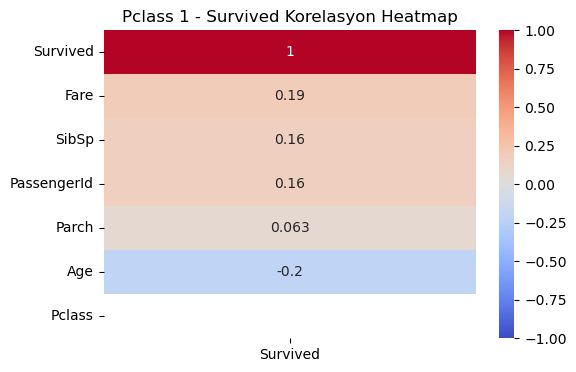

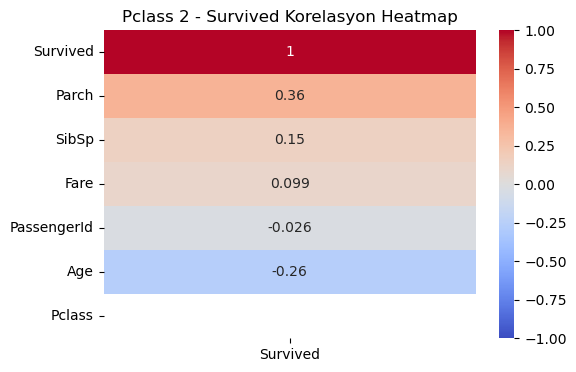

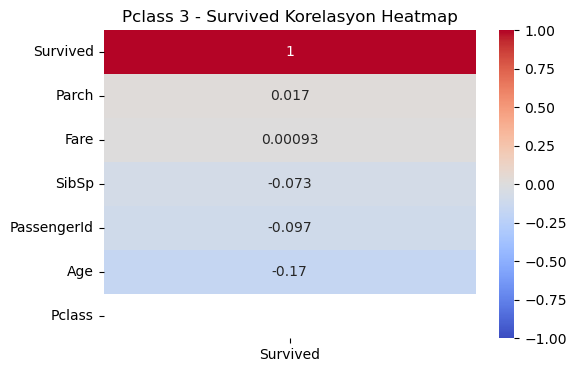

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for cls in sorted(df['Pclass'].unique()):
    subset = df[df['Pclass'] == cls]

    # Sadece numerik kolonları alalım
    corr = subset.select_dtypes(include=['float64', 'int64']).corr()

    plt.figure(figsize=(6,4))
    sns.heatmap(corr[['Survived']].sort_values(by='Survived', ascending=False), 
                annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Pclass {cls} - Survived Korelasyon Heatmap")
    plt.show()


In [18]:
df.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


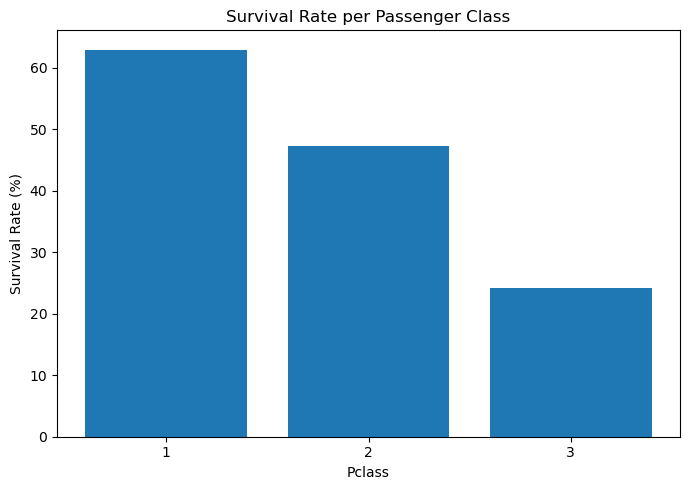

In [20]:
import matplotlib.pyplot as plt

# Her sınıf için hayatta kalma oranı (yüzdelik)
survival_rate = df.groupby("Pclass")["Survived"].mean() * 100

plt.figure(figsize=(7,5))
plt.bar(survival_rate.index.astype(str), survival_rate.values)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate per Passenger Class")
plt.tight_layout()
plt.show()


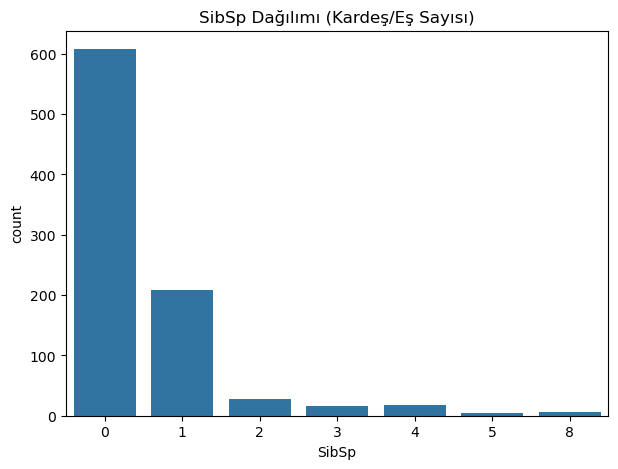

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(x="SibSp", data=df)
plt.title("SibSp Dağılımı (Kardeş/Eş Sayısı)")
plt.show()
